# Medical Insurace Estimation using Linear Regression

## About Dataset
**Age**: Age of primary beneficiary <p>
**Sex**: Insurance contractor gender, female, male <p>
**Bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height <p>
**Children**: Number of children covered by health insurance / Number of dependents<p>
**Smoker**: Smoking<p>
**Region**: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<p>
**Charges**: Individual medical costs billed by health insurance<p>

In [ ]:
# Imports

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Getting the Data

In [ ]:
# Now let's read the dataset:

df = pd.read_csv("insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1161,34,male,42.130,2,no,southeast,5124.18870
543,54,female,47.410,0,yes,southeast,63770.42801
169,27,male,18.905,3,no,northeast,4827.90495
501,43,male,26.030,0,no,northeast,6837.36870
172,18,male,15.960,0,no,northeast,1694.79640
1021,22,female,31.020,3,yes,southeast,35595.58980
719,58,female,33.440,0,no,northwest,12231.61360
55,58,male,36.955,2,yes,northwest,47496.49445
362,19,female,21.700,0,yes,southwest,13844.50600
466,60,female,28.700,1,no,southwest,13224.69300


## Checking the Data

In [ ]:
# Getting the bascic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Getteing the basic information about the distribution of our datasets
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Checking for duplicated values

duplicated = len(df[df.duplicated()])
print(f'There ara {duplicated} duplicated rows')
df = df.drop_duplicates()

There ara 1 duplicated rows


## Exploratory Data Analysis

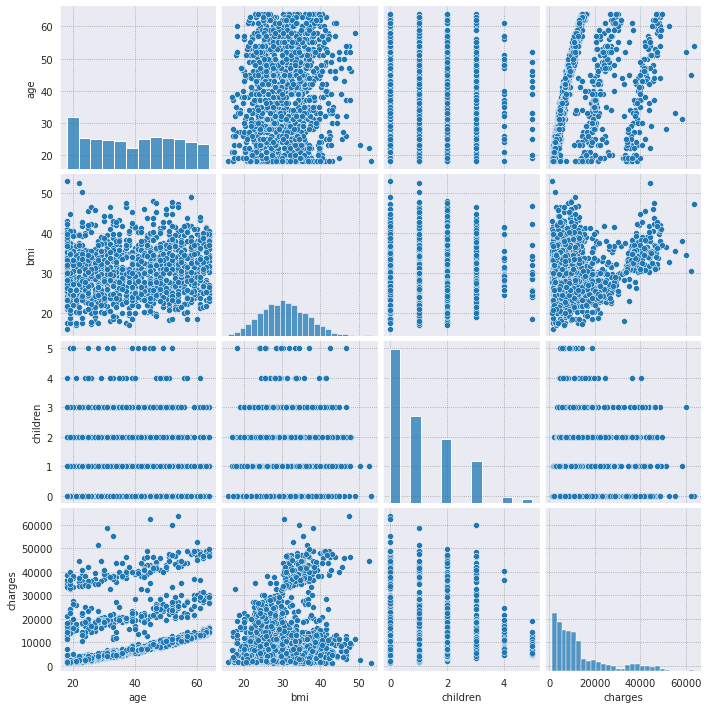

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.pairplot(df)

Text(0.5, 1.0, 'Charges')

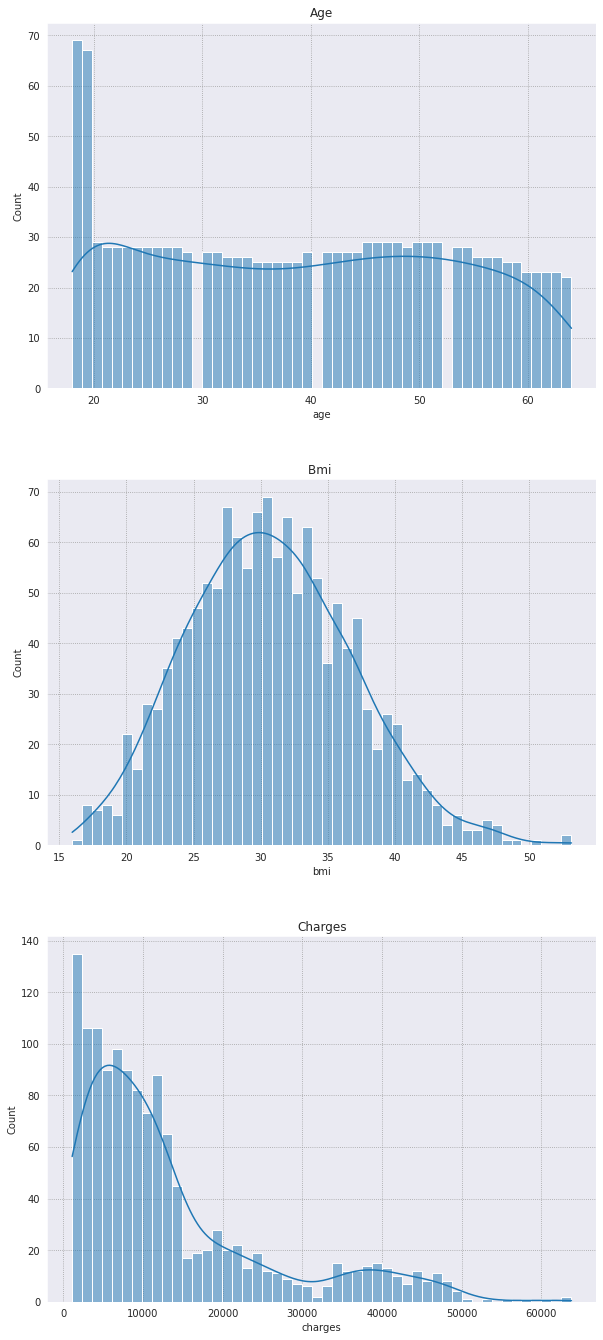

In [ ]:
f, ax = plt.subplots(3, figsize=(10,20))
f.tight_layout(pad=7.0)

sns.histplot(x=df['age'],bins=50,kde=True,ax=ax[0])
sns.histplot(x=df['bmi'],bins=50,kde=True,ax=ax[1])
sns.histplot(x=df['charges'],bins=50,kde=True,ax=ax[2])

ax[0].set_title('Age')
ax[1].set_title('Bmi ')
ax[2].set_title('Charges')


In [ ]:
df['charges'].quantile(.95)

41210.04980000002

**It seems like equal numbers of data is extracted from different age groups , bmi follow the normal distribution , while most of charges are in the range from 0 to 40000**

Text(0.5, 1.0, 'Region')

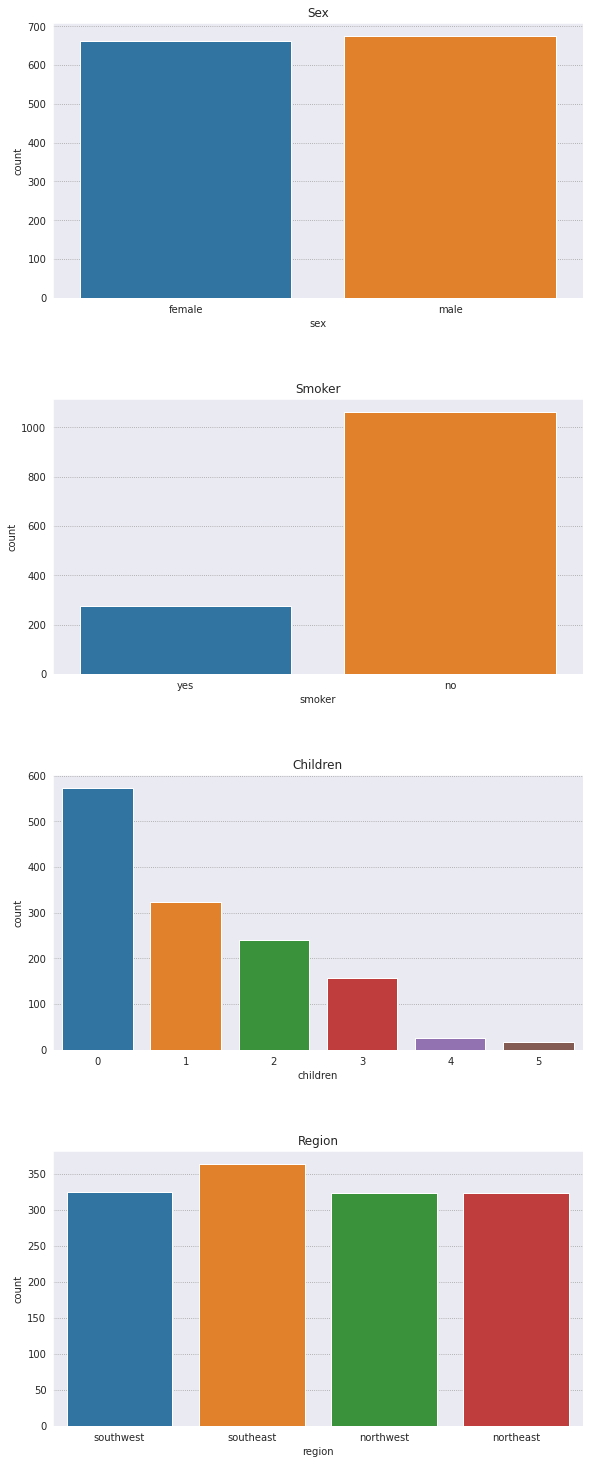

In [ ]:
f, ax = plt.subplots(4, figsize=(10,22))
f.tight_layout(pad=8.0)

sns.countplot(x=df['sex'], data=df, ax=ax[0])
sns.countplot(x=df['smoker'], data=df, ax=ax[1])
sns.countplot(x=df['children'], data=df, ax=ax[2])
sns.countplot(x=df['region'], data=df, ax=ax[3])

ax[0].set_title('Sex')
ax[1].set_title('Smoker')
ax[2].set_title('Children')
ax[3].set_title('Region')

**It seems like data is taken equally from all the region and have same percentage of male and female data , additionly the number of non smoker is greater than the number of smokers**

In [ ]:
# Checking the effect of age on the insurance
# Turning Age into Categorical Variables:

df.loc[(df["age"] >= 18) & (df["age"] <= 30), 'age_category'] = 'young '
df.loc[(df["age"] >= 30) & (df["age"] <= 50), 'age_category'] = "adult"
df.loc[(df["age"] >= 50), 'age_category'] = "old"
df.head()

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,adult
4,32,male,28.880,0,no,northwest,3866.85520,adult


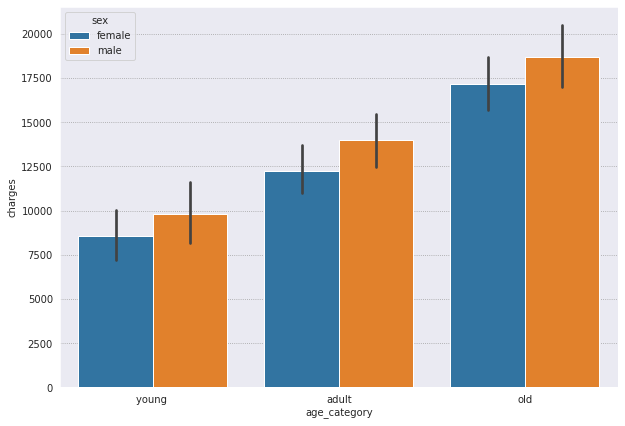

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = sns.barplot(x='age_category', y='charges', hue='sex', data=df)

**The more old as the person gets the more medical charges he/she  has to pay**

In [ ]:
# Checking the effect of smoking on the medical charges
df.value_counts("smoker")

smoker
no     1063
yes     274
dtype: int64

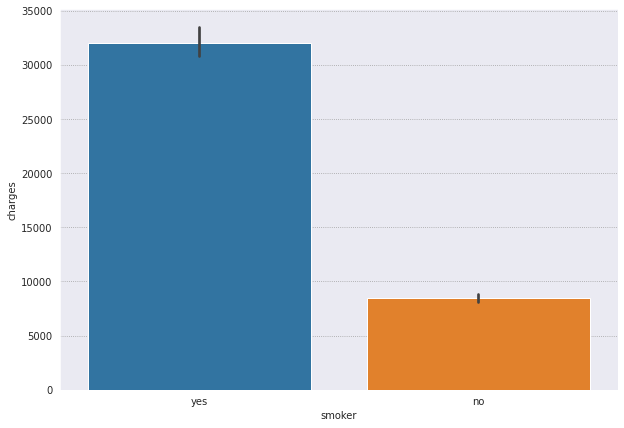

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = sns.barplot(x='smoker', y='charges', data=df)

**It is clear that the people who smokes has very high medical charges than the people that do not smoke, it is one of most influencing factor for medical insurance cost** 

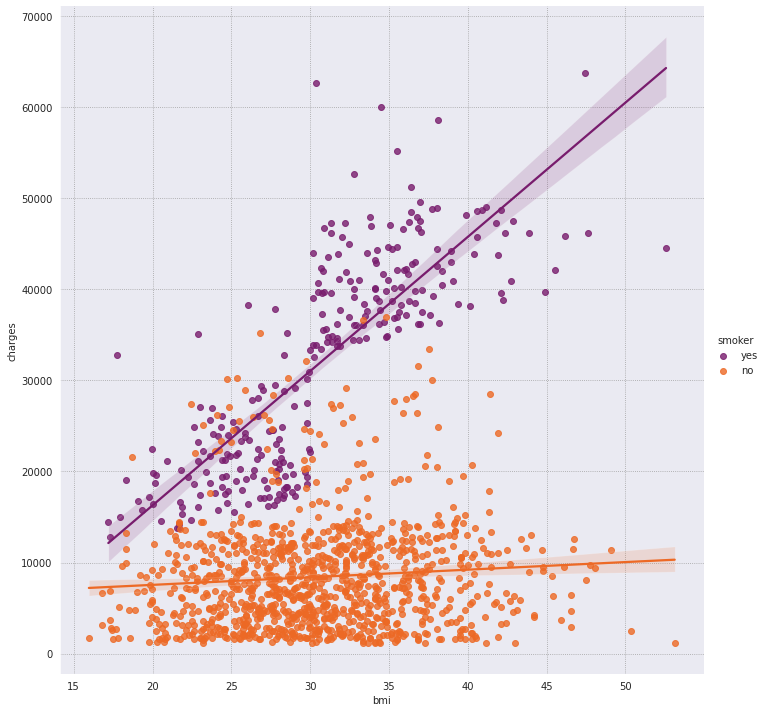

In [ ]:
# Checking the effect of bmi on the medical charges
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'inferno', size = 10)
plt.show()

**It seems that bmi of the person also have some effect on the insurance especially if the person is a smoker**

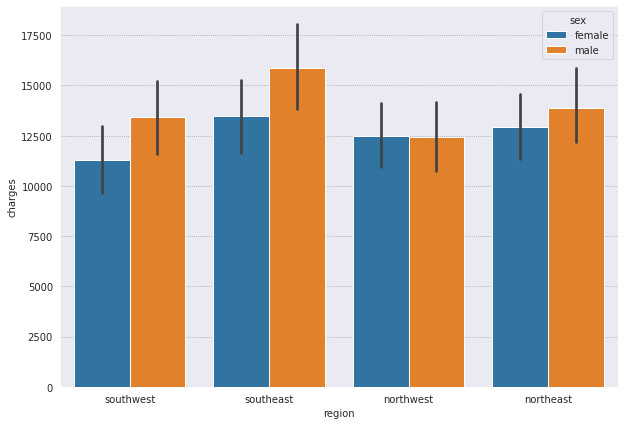

In [ ]:
# Checking the effect of region on the medical charges
f, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df)

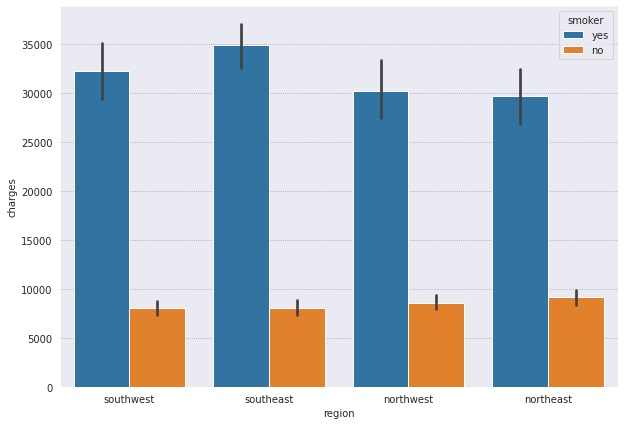

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df)

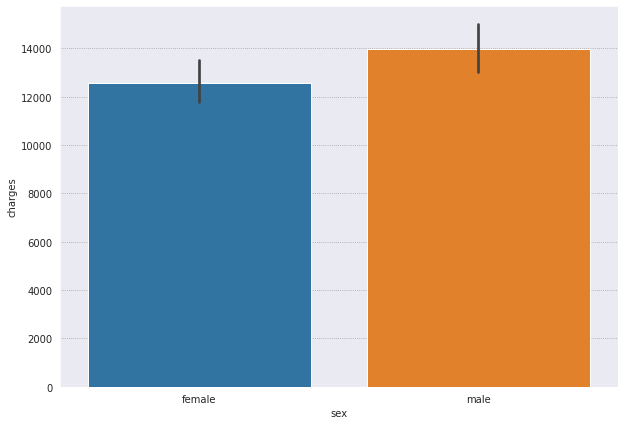

In [ ]:
# Checking the effect of gender on the medical charges
f, ax = plt.subplots(1,1, figsize=(10,7))
ax = sns.barplot(x = 'sex', y = 'charges', data=df)

**Region and gender has very less effect on the insurance cost**

## Corelation

In [ ]:
# Encoding the data
df = pd.get_dummies(df,columns=['children','smoker','age_category'],drop_first=True)

In [ ]:
df.corr()

,age,bmi,charges,children_1,children_2,children_3,children_4,children_5,smoker_yes,age_category_old,age_category_young
age,1.000000,0.109344,0.298308,0.009328,0.007453,0.060921,-0.002184,-0.030047,-0.025587,0.787290,-0.799826
bmi,0.109344,1.000000,0.198401,-0.003738,0.024134,0.001249,0.016473,-0.020276,0.003746,0.103929,-0.090112
charges,0.298308,0.198401,1.000000,-0.025598,0.069333,0.062558,0.006517,-0.043357,0.787234,0.242874,-0.226424
children_1,0.009328,-0.003738,-0.025598,1.000000,-0.264527,-0.206289,-0.078068,-0.066067,-0.023348,-0.074392,-0.097315
children_2,0.007453,0.024134,0.069333,-0.264527,1.000000,-0.170613,-0.064566,-0.054641,0.028077,-0.073641,-0.070194
children_3,0.060921,0.001249,0.062558,-0.206289,-0.170613,1.000000,-0.050351,-0.042611,0.039283,0.024580,-0.099613
children_4,-0.002184,0.016473,0.006517,-0.078068,-0.064566,-0.050351,1.000000,-0.016126,-0.029046,-0.026814,-0.009286
children_5,-0.030047,-0.020276,-0.043357,-0.066067,-0.054641,-0.042611,-0.016126,1.000000,-0.043231,-0.059957,-0.008419
smoker_yes,-0.025587,0.003746,0.787234,-0.023348,0.028077,0.039283,-0.029046,-0.043231,1.000000,-0.044605,0.002988
age_category_old,0.787290,0.103929,0.242874,-0.074392,-0.073641,0.024580,-0.026814,-0.059957,-0.044605,1.000000,-0.427394


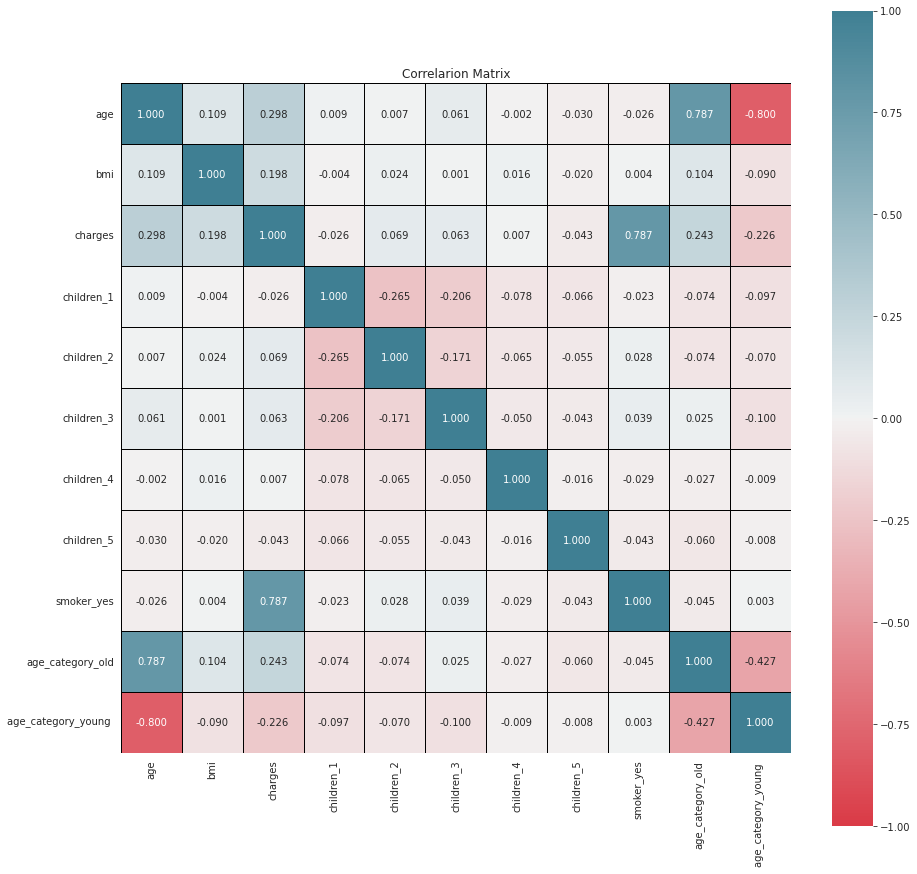

In [ ]:
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(
    data=df.corr(), 
    vmin=-1.0, 
    vmax=1.0, 
    center=0, 
    cmap=cmap, 
    square=True,
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.3f',

)
plt.title('Correlarion Matrix')
plt.show()

## Outlier Detection

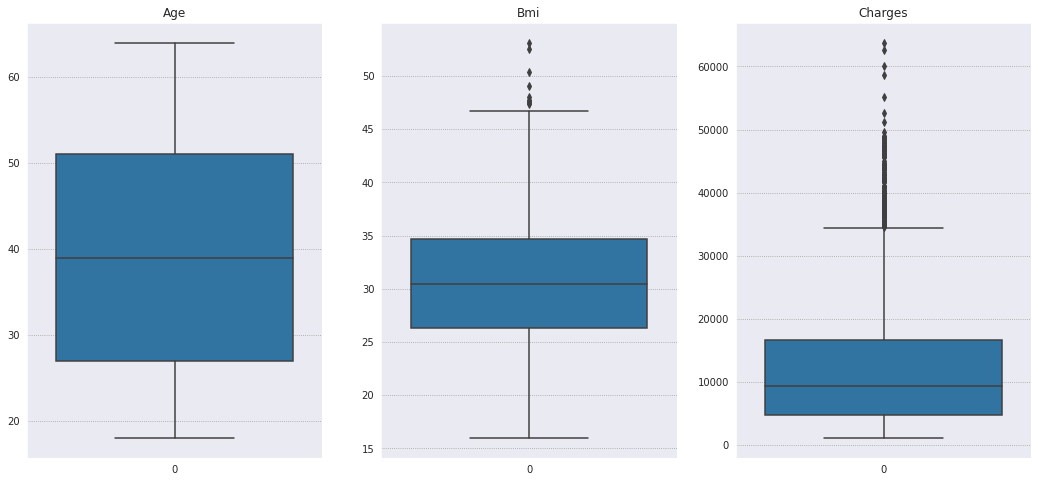

In [ ]:
# Plotting some boxplot for checking of outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

sns.boxplot(ax=axes[0], data=df['age'])
sns.boxplot(ax=axes[1], data=df['bmi'])
sns.boxplot(ax=axes[2], data=df['charges'])

axes[0].set_title('Age')
axes[1].set_title('Bmi')
axes[2].set_title('Charges')
plt.show()

**It seems like our bmi column has some outlier , as we know the bmi data is normally distributed , so we will use the Z score metod to cap these outliers**

In [ ]:
# Handling the outlier
upper_limit = df['bmi'].mean() + 3*df['bmi'].std()
lower_limit = df['bmi'].mean() - 3*df['bmi'].std()

df['bmi'] = np.where( df['bmi']>upper_limit,
                       upper_limit,
                       np.where(  df['bmi']<lower_limit,
                                  lower_limit,
                                   df['bmi'] ))

In [ ]:
# Selecting the features
df = df.drop(['age','sex','region'],axis=1)
df.sample(5)

,bmi,charges,children_1,children_2,children_3,children_4,children_5,smoker_yes,age_category_old,age_category_young
1199,25.800,4934.70500,0,1,0,0,0,0,0,0
890,26.885,29330.98315,0,0,0,0,0,1,1,0
227,41.910,24227.33724,0,0,0,0,0,0,1,0
144,28.690,20745.98910,0,0,1,0,0,1,0,0
127,37.400,9634.53800,0,0,0,0,0,0,1,0


## Splitting the data

In [ ]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(1069, 268, 1069, 268)

## Linear regression Model

In [ ]:
# Scaling the data
scaler=StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [ ]:
    # Regression metrics
def regression_results(y_true, y_pred):
        explained_variance=metrics.explained_variance_score(y_true, y_pred)
        mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
        mse=metrics.mean_squared_error(y_true, y_pred) 
        median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
        r2=metrics.r2_score(y_true, y_pred)

        print('explained_variance: ', round(explained_variance,4))    
        print('r2: ', round(r2,4))
        print('MAE: ', round(mean_absolute_error,4))
        print('MSE: ', round(mse,4))
        print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
# Traning and testing the model
lr=LinearRegression()
lr.fit(X_train_scale,y_train,)
predict=lr.predict(X_test_scale)
regression_results(y_test,predict)


explained_variance:  0.7918
r2:  0.7911
MAE:  4523.572
MSE:  38392182.2391
RMSE:  6196.1425


(0.0, 70000.0)

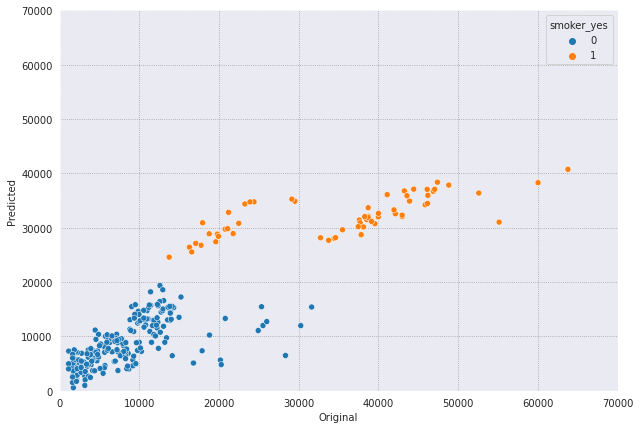

In [ ]:
# Visualizing the prediction
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test,y=predict,hue=X_test['smoker_yes'])
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.ylim(0,70000)
plt.xlim(0,70000)

In [ ]:
df_coef = pd.DataFrame(lr.coef_, 
                       X_train.columns,
                       columns=['Coef'])

df_coef

,Coef
bmi,1798.162754
children_1,411.694091
children_2,928.663905
children_3,445.857729
children_4,671.118117
children_5,222.039728
smoker_yes,9256.554202
age_category_old,2784.651306
age_category_young,-1050.819711


# Conclusion
**From the above data it is clear that smoking is the main cause of high medical insurance as it lead to health deterioration for most of the people followed by old age and bmi.**

#★·.·´¯`·.·★ Ｔℍᗩ𝕟Ⓚ ㄚ𝕠𝓤 ★·.·´¯`·.·★